In [1]:
#PatientPop Data Team Take Home Challenge

#Questions:
#Do the “long” surveys result in significantly more reviews than the “short” surveys?
#Which “long” survey has a greater impact (v1 or v2)?
#What kinds of practices do best with “long” survey v1? Would you recommend “long” survey v2 to any specific kinds of practices?
#Do ratings change significantly with either “long” survey? How would you predict which practices will have success, defined as at least a 0.3 star increase in their “long” survey average monthly rating vs their “short” survey average monthly rating? 
#Would you recommend replacing the “short” survey with either (or both) of the “long” surveys for any or all practices? Provide reasons to support your answer. If you do not have enough data to make a recommendation, what additional data would you need?

In [2]:
# Import Libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 8,4
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Libraries Version used as below
# python 3.6.8
    
print(pd.__version__) 
print(np.__version__)

0.24.2
1.16.2


In [7]:
# Read Given Data File

reviews = pd.read_csv("D:\\Off Campus Application\\PatientPop\\PP_reviews.csv")
print(len(reviews))

410413


In [8]:
reviews.head()

,review_id,review_date,rating,practice_id,n_providers,n_providers_surveys,short_start_date,long_start_date,version,city,state,zip,tech_type,specialty,Review_type
0,274252,2017-05-23,5.0,2,1,1,2017-04-13,2017-10-10,v1,Santa Monica,CA,90404,ATHEN,Obstetrician and Gynecologist,Short
1,267767,2017-12-30,5.0,2,1,1,2017-04-13,2017-10-10,v1,Santa Monica,CA,90404,ATHEN,Obstetrician and Gynecologist,Long
2,626201,2018-04-03,1.0,2,1,1,2017-04-13,2017-10-10,v1,Santa Monica,CA,90404,ATHEN,Obstetrician and Gynecologist,Long
3,161319,2017-09-08,5.0,3,1,1,2017-09-03,2018-03-02,v2,Santa Monica,CA,90404,ADVAN,Obstetrician and Gynecologist,Short
4,275147,2017-09-11,5.0,3,1,1,2017-09-03,2018-03-02,v2,Santa Monica,CA,90404,ADVAN,Obstetrician and Gynecologist,Short


In [9]:
# Data Cleaning
# Following step eleiminates records in which dates are wrongly typed or greter than todays date

reviews = reviews[reviews["review_date"] < '2019-06-01']
print(len(reviews))


410411


In [10]:
# Make a Bool Variable Long to Find Long Reviews
reviews["Long"] = reviews["review_date"] >= reviews["long_start_date"]


In [11]:
# Convert Dates to Datetime objects
reviews["review_date"] = pd.to_datetime(reviews["review_date"], format='%Y-%m-%d')
reviews["long_start_date"] = pd.to_datetime(reviews["long_start_date"], format="%Y-%m-%d")
reviews["short_start_date"] = pd.to_datetime(reviews["short_start_date"], format="%Y-%m-%d")


In [12]:
# Find Serial Month of the Review From Respective Start Date
reviews["long_review_month"] = (reviews["review_date"].dt.to_period('M').astype(int) - 
                                reviews["long_start_date"].dt.to_period('M').astype(int))*reviews["Long"]
reviews["short_review_month"] = (reviews["review_date"].dt.to_period('M').astype(int) - 
                                 reviews["short_start_date"].dt.to_period('M').astype(int))*(1 - reviews["Long"])
reviews["month"] = reviews["short_review_month"] + reviews["long_review_month"]

In [13]:
print(reviews.head())

   review_id review_date  rating  practice_id  n_providers  \
0     274252  2017-05-23     5.0            2            1   
1     267767  2017-12-30     5.0            2            1   
2     626201  2018-04-03     1.0            2            1   
3     161319  2017-09-08     5.0            3            1   
4     275147  2017-09-11     5.0            3            1   

   n_providers_surveys short_start_date long_start_date version          city  \
0                    1       2017-04-13      2017-10-10      v1  Santa Monica   
1                    1       2017-04-13      2017-10-10      v1  Santa Monica   
2                    1       2017-04-13      2017-10-10      v1  Santa Monica   
3                    1       2017-09-03      2018-03-02      v2  Santa Monica   
4                    1       2017-09-03      2018-03-02      v2  Santa Monica   

  state    zip tech_type                      specialty Review_type   Long  \
0    CA  90404     ATHEN  Obstetrician and Gynecologist       

In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410411 entries, 0 to 410412
Data columns (total 19 columns):
review_id              410411 non-null int64
review_date            410411 non-null datetime64[ns]
rating                 410411 non-null float64
practice_id            410411 non-null int64
n_providers            410411 non-null int64
n_providers_surveys    410411 non-null int64
short_start_date       410411 non-null datetime64[ns]
long_start_date        410411 non-null datetime64[ns]
version                410411 non-null object
city                   410411 non-null object
state                  410411 non-null object
zip                    410411 non-null int64
tech_type              407464 non-null object
specialty              378957 non-null object
Review_type            410411 non-null object
Long                   410411 non-null bool
long_review_month      410411 non-null int64
short_review_month     410411 non-null int64
month                  410411 non-null int64


In [15]:
reviews.describe()

,review_id,rating,practice_id,n_providers,n_providers_surveys,zip,long_review_month,short_review_month,month
count,4.104110e+05,410411.000000,410411.000000,410411.000000,410411.000000,410411.000000,410411.000000,410411.000000,410411.00000
mean,1.143603e+06,3.567966,12097.958870,5.336031,4.238451,53547.166718,4.498798,0.627232,5.12603
std,5.004609e+05,2.172084,1955.651419,6.909297,6.295070,31017.670248,4.244429,1.510782,3.82806
min,9.847100e+04,0.000000,2.000000,1.000000,0.000000,1028.000000,0.000000,0.000000,0.00000
25%,7.317475e+05,1.000000,10796.000000,1.000000,1.000000,23462.000000,1.000000,0.000000,2.00000
50%,1.218287e+06,5.000000,12100.000000,2.000000,1.000000,60181.000000,3.000000,0.000000,4.00000
75%,1.620050e+06,5.000000,13418.000000,6.000000,5.000000,78758.000000,8.000000,0.000000,8.00000
max,1.847052e+06,5.000000,15923.000000,35.000000,33.000000,99701.000000,15.000000,6.000000,15.00000


In [16]:
# Change into category type

reviews.version = reviews.version.astype('category')
reviews.Review_type = reviews.Review_type.astype('category')

In [17]:
# Question 1
# Count of Review Type

Review_count = reviews['Review_type'].value_counts()
Review_count

Long     329755
Short     80656
Name: Review_type, dtype: int64

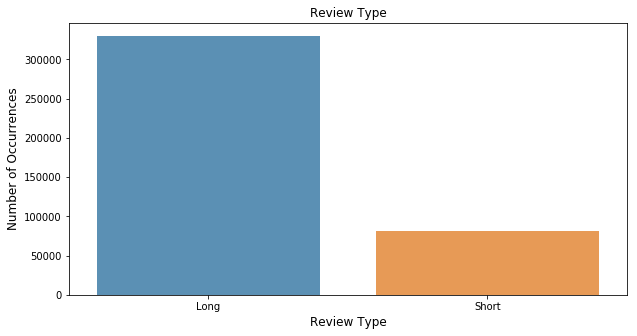

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(Review_count.index, Review_count.values, alpha=0.8)
plt.title('Review Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Review Type', fontsize=12)
plt.show()

-----

-----

In [19]:

# Select Required Fields from Reviews
df1 = reviews.filter(["practice_id", "Long", "version", "month"])

# Group df1 and Find counts of each group
df2 = df1.groupby(["practice_id", "Long", "version", "month"]).size().reset_index()
df2.columns = ["practice_id", "Long", "version", "month", "count"]

# Split df2 into Short, Long v1 and Long v2 Surveys
df2_short = df2.loc[df2["Long"] == False]
df2_long = df2.loc[(df2["Long"] == True)]
df2_long_v1 = df2_long.loc[df2_long["version"] == "v1"]
df2_long_v2 = df2_long.loc[df2_long["version"] == "v2"]

Short reviews generated per month: 5.62


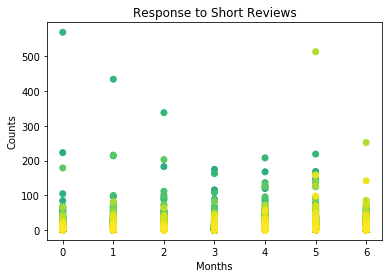

In [20]:
# Find Average Monthly Reviews Generated by Short Reviews
df3 = df2_short.filter(["practice_id", "month", "count"])
print("Short reviews generated per month: %.2f" % df3["count"].mean())
# Plot Graph
plt.scatter(df3["month"], df3["count"], c = df3["practice_id"])
plt.title("Response to Short Reviews")
plt.xlabel("Months")
plt.ylabel("Counts")
plt.show()


Long v1 reviews generated per month: 6.52


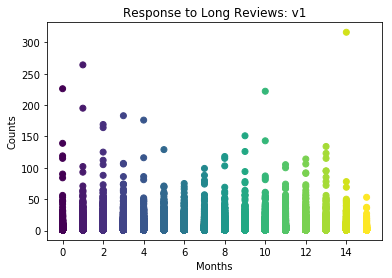

In [21]:
# Find Average Monthly Long v1 reviews
df3 = df2_long_v1.filter(["practice_id", "month", "count"])
print("Long v1 reviews generated per month: %.2f" % df3["count"].mean())

# Plot Graph
plt.scatter(df3["month"], df3["count"], c = df3["month"])
plt.title("Response to Long Reviews: v1")
plt.xlabel("Months")
plt.ylabel("Counts")
plt.show()

Long v2 reviews generated per month: 29.22


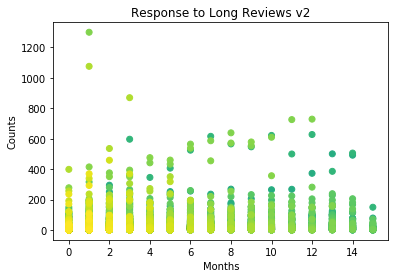

In [22]:
# Find monthly average v2 review
df3 = df2_long_v2.filter(["practice_id", "month", "count"])
print("Long v2 reviews generated per month: %.2f" % df3["count"].mean())

# Plot
plt.scatter(df3["month"], df3["count"], c = df3["practice_id"])
plt.title("Response to Long Reviews v2")
plt.xlabel("Months")
plt.ylabel("Counts")
plt.show()

In [23]:
# Question 2
# Collect desired fields
df1 = reviews.filter(["specialty", "Long", "version", "month", "rating"])

# Find Unique Specialty Names
names = list(df1["specialty"].unique())

# Create a new column of level = index of specialty in names list
names_dict = {name: idx for idx, name in enumerate(names)}
def levels(s1):
    return names_dict[s1]
df1["level"] = df1["specialty"].apply(levels)

# Find counts of groups
df2 = df1.groupby(["specialty", "level", "Long", "version"]).size().reset_index()
df2.columns = ["specialty", "level", "Long", "version", "count"]

# Split df2 by Long v1 and Long v2
df2_long = df2.loc[(df2["Long"] == True)]
df2_long_v1 = df2_long.loc[df2_long["version"] == "v1"]
df2_long_v2 = df2_long.loc[df2_long["version"] == "v2"]

# Choose records Long v1 reviews
df3 = df2_long_v1.filter(["specialty", "level", "count"])
df3 = df3.loc[df3["count"] > 2000]
df3.sort_values(["count"], ascending = False, inplace=True)
print(df3)

                         specialty  level  count
114  Obstetrician and Gynecologist      0  19359
39                   Dermatologist      4  11672
54                 General Dentist      1  10655
27                    Chiropractor     20   8652
58            General Practitioner      3   7684
176                     Podiatrist      9   7188
158                   Pediatrician     33   6655
83                       Internist     32   5803
93                     Medical Spa     47   4647
140             Orthopedic Surgeon      8   4336
172                Plastic Surgeon      7   4186
128                    Optometrist      2   3914
124                Ophthalmologist      6   3704
150     Pain Management Specialist     18   3430
50              Gastroenterologist     17   3147
35                Cosmetic Dentist     11   2555
89                  Medical Clinic     48   2332
146               Otolaryngologist      5   2311


In [24]:
# Repeat for Long v2 Reviews
df3 = df2_long_v2.filter(["specialty", "level", "count"])
df3 = df3.loc[df3["count"] > 2000]
df3.sort_values(["count"], ascending = False, inplace=True)
print(df3)

                         specialty  level  count
115  Obstetrician and Gynecologist      0  74324
55                 General Dentist      1  16463
141             Orthopedic Surgeon      8  13091
159                   Pediatrician     33   7884
40                   Dermatologist      4   6885
84                       Internist     32   6124
59            General Practitioner      3   5744
177                     Podiatrist      9   5606
36                Cosmetic Dentist     11   5453
125                Ophthalmologist      6   3582
51              Gastroenterologist     17   2743
28                    Chiropractor     20   2579
151     Pain Management Specialist     18   2413
203      Sleep Medicine Specialist     49   2074
155              Pediatric Dentist     25   2072


In [25]:
# Question 3
# Choose desired fields
df1 = reviews.filter(["specialty", "Long", "rating"])
df1["rating"] = pd.to_numeric(df1["rating"])

# Find average rating of each group
df2 = df1.groupby(["specialty", "Long"]).mean().reset_index()

# Isolate short reviews
df2_short = df2[df2["Long"] == False]
df2_short.reset_index(inplace=True, drop=True)

# Isolate long reviews
df2_long = df2[df2["Long"] == True]
df2_long.reset_index(inplace=True, drop=True)

# Build new dataframe of desired fields
df3 = df2_short.filter(["specialty", "rating"])
df3.rename(columns={"rating": "short_rating"}, inplace=True)
df3["long_rating"] = df2_long["rating"]

# Select Long reviews getting more than 0.3 stars over Short reviews
df4 = df3.loc[df3["long_rating"] >= df3["short_rating"] + 0.3]
print(df4)

                        specialty  short_rating  long_rating
1   Addiction Medicine Specialist      3.750000     4.131579
21  Infectious Disease Specialist      1.823529     3.500000
55                    Radiologist      2.866667     3.369444


In [26]:
# Question 4
# Select records with higher long rating than short rating
df4 = df3.loc[df3["long_rating"] > df3["short_rating"]]
print(df4)

                        specialty  short_rating  long_rating
1   Addiction Medicine Specialist      3.750000     4.131579
3                Anesthesiologist      3.242857     3.369231
21  Infectious Disease Specialist      1.823529     3.500000
27                   Nephrologist      3.062500     3.264127
54                  Pulmonologist      2.785714     2.952941
55                    Radiologist      2.866667     3.369444
